# Iris Flower Classification

Task is to train a machine learning model that can learn from the measurements of the iris species and classify them.

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from skimpy import skim
from scipy.stats import mode
import warnings
warnings.filterwarnings('ignore')

### Loading the Data

In [10]:
df = pd.read_csv(r"C:\Users\bbhav\Downloads\Unemployment\Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
df.shape

(150, 6)

In [12]:
df.drop('Id',axis=1,inplace=True)

In [13]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 150    │ │ float64     │ 4     │                                                          │
│ │ Number of columns │ 5      │ │ string      │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┓  │
│ ┃ column_name           ┃ NA   ┃ NA %    ┃ mean    ┃ sd      ┃ p0     ┃ p25    ┃ p75    ┃ p100    ┃ hist     ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━┩  │
│ │ SepalLengthCm         │    0 │       0 │     5.8 │    0.83 │    4.3 │    5.1 │    6.4 │     7.9 │  ▃██▇▅▂  │  │
│ │ SepalWidthCm          │    0 │       0 │     3.1 │    0.43 │      2 │    2.8 │    3.3 │     4.4 │  ▁▆█▇▂▁  │  │
│ │ PetalLengthCm         │    0 │       0 │     3.8 │     1.8 │      1 │    1.6 │    5.1 │     6.9 │  █ ▂▇▆▂  │  │
│ │ PetalWidthCm          │    0 │       0 │     1.2 │    0.76 │    0.1 │    0.3 │    1.8 │     2.5 │  █ ▂▆▄▄  │  │
│ └───────────────────────┴──────┴─────────┴─────────┴─────────┴────────┴────────┴────────┴─────────┴──────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Species                   │       0 │          0 │                            1 │                      150 │  │
│ └───────────────────────────┴─────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

### Splitting the Data into Train and Test

In [14]:
# Divide the dataset into train and test.
# Target: Species (output)
from sklearn.model_selection import train_test_split

In [8]:
#from sklearn.preprocessing import LabelEncoder
#label_encoder = LabelEncoder()
#Y = label_encoder.fit_transform(Y)

In [19]:
# train_test_split => shuffles the data first, then it will split the data into train and test. 
X_train, X_test,Y_train, Y_test = train_test_split(df.drop("Species", axis=1),df["Species"],test_size=0.25,random_state=65)

In [22]:
print(X_train.shape, Y_train.shape)

(112, 4) (112,)


In [23]:
print(X_test.shape, Y_test.shape)

(38, 4) (38,)


###   Train data :

>### Applying `StandardScalar` for Numerical Values

In [24]:
# Filtering all Numerical data type
X_train_numeric = X_train.select_dtypes(['int','float'])
X_train_numeric.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
128,6.4,2.8,5.6,2.1
111,6.4,2.7,5.3,1.9
10,5.4,3.7,1.5,0.2
37,4.9,3.1,1.5,0.1
92,5.8,2.6,4.0,1.2


In [25]:
X_train_numeric.shape

(112, 4)

In [26]:
# Standardization

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train_num_df = pd.DataFrame(sc.fit_transform(X_train_numeric), index=X_train_numeric.index,\
             columns=X_train_numeric.columns)

X_train_num_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
128,0.717793,-0.616337,1.055237,1.183780
111,0.717793,-0.844912,0.884118,0.920456
10,-0.519019,1.440840,-1.283397,-1.317792
37,-1.137425,0.069389,-1.283397,-1.449454
92,-0.024295,-1.073487,0.142600,-0.001176


In [27]:
X_train_num_df.shape

(112, 4)

In [28]:
X_train_processed = X_train_num_df

### Test Data:

In [29]:
# Filtering all Numerical type data
X_test_num = X_test.select_dtypes(['int','float'])

X_test_num_df = pd.DataFrame(sc.transform(X_test_num), index=X_test_num.index,\
             columns=X_test_num.columns)

X_test_num_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
127,0.346749,-0.159186,0.655958,0.788795
68,0.470430,-1.987788,0.427799,0.393810
9,-1.137425,0.069389,-1.283397,-1.449454
54,0.841474,-0.616337,0.484839,0.393810
31,-0.519019,0.755115,-1.283397,-1.054469


In [30]:
X_test_processed = X_test_num_df
X_test_processed.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
127,0.346749,-0.159186,0.655958,0.788795
68,0.470430,-1.987788,0.427799,0.393810
9,-1.137425,0.069389,-1.283397,-1.449454
54,0.841474,-0.616337,0.484839,0.393810
31,-0.519019,0.755115,-1.283397,-1.054469


### Model Building

> ### a) Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, Y_train)

y_pred_lr = lr.predict(X_test)

In [40]:
from sklearn.metrics import accuracy_score,classification_report
acc_lr =accuracy_score(Y_test,y_pred_lr)

print(acc_lr)
print(classification_report(Y_test, y_pred_lr))

0.9736842105263158
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.92      0.96        12
 Iris-virginica       0.93      1.00      0.96        13

       accuracy                           0.97        38
      macro avg       0.98      0.97      0.97        38
   weighted avg       0.98      0.97      0.97        38



>### b) Decision Tree

In [41]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train)

y_pred_dt = dt.predict(X_test)
acc_dt =accuracy_score(Y_test,y_pred_dt)

print(acc_dt)
print(classification_report(Y_test, y_pred_dt))

0.9473684210526315
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.92      0.92      0.92        12
 Iris-virginica       0.92      0.92      0.92        13

       accuracy                           0.95        38
      macro avg       0.95      0.95      0.95        38
   weighted avg       0.95      0.95      0.95        38



>### c) KNN

In [42]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train_processed, Y_train)

y_pred_knn= knn.predict(X_test_processed)
acc_knn =accuracy_score(Y_test,y_pred_knn)

print(acc_knn)
print(classification_report(Y_test, y_pred_knn))

0.868421052631579
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.82      0.75      0.78        12
 Iris-virginica       0.79      0.85      0.81        13

       accuracy                           0.87        38
      macro avg       0.87      0.87      0.87        38
   weighted avg       0.87      0.87      0.87        38



>### d) Random Forest

In [43]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train_processed, Y_train)

y_pred_rf = rf.predict(X_test_processed)
acc_rf =accuracy_score(Y_test,y_pred_rf)

print(acc_rf)
print(classification_report(Y_test, y_pred_rf))

0.9736842105263158
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.92      0.96        12
 Iris-virginica       0.93      1.00      0.96        13

       accuracy                           0.97        38
      macro avg       0.98      0.97      0.97        38
   weighted avg       0.98      0.97      0.97        38



>### e) SVM

In [44]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train_processed, Y_train)

y_pred_svm = svm.predict(X_test_processed)
acc_svm =accuracy_score(Y_test,y_pred_svm)

print(acc_svm)
print(classification_report(Y_test, y_pred_svm))

0.8947368421052632
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.90      0.75      0.82        12
 Iris-virginica       0.80      0.92      0.86        13

       accuracy                           0.89        38
      macro avg       0.90      0.89      0.89        38
   weighted avg       0.90      0.89      0.89        38



In [45]:
df1 = pd.DataFrame({'Algorithm':['Logistic Regression','Decision Tree','KNN','Random Forest','SVM'],'Accuracy':[acc_lr,acc_dt,acc_knn,acc_rf,acc_svm]})
df1

,Algorithm,Accuracy
0,Logistic Regression,0.973684
1,Decision Tree,0.947368
2,KNN,0.868421
3,Random Forest,0.973684
4,SVM,0.894737


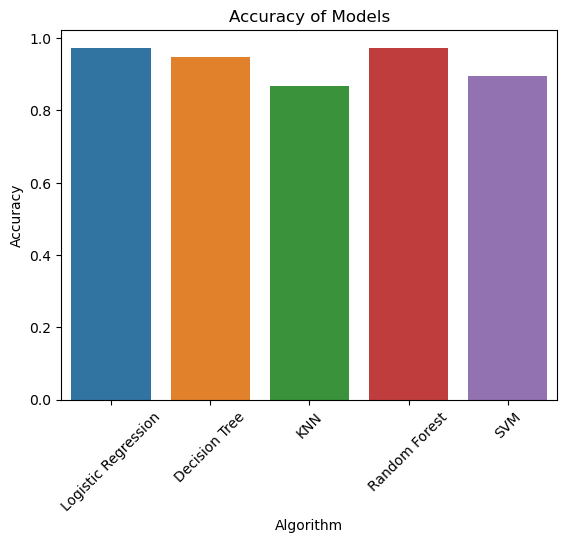

In [54]:
sns.barplot(x = 'Algorithm', y='Accuracy', data = df1)
plt.title('Accuracy of Models')
plt.xticks(rotation=45)
plt.show()

> Both RandomForest and Logistic Regression has equal and high accuracy.

### Conclusion: 

We can conclude that Logistic Regression and DecisionTree algorithm models has high accuracy, compared to other models. So these two are highly recommendable. Whereas KNN has least accuray among all classifiers.